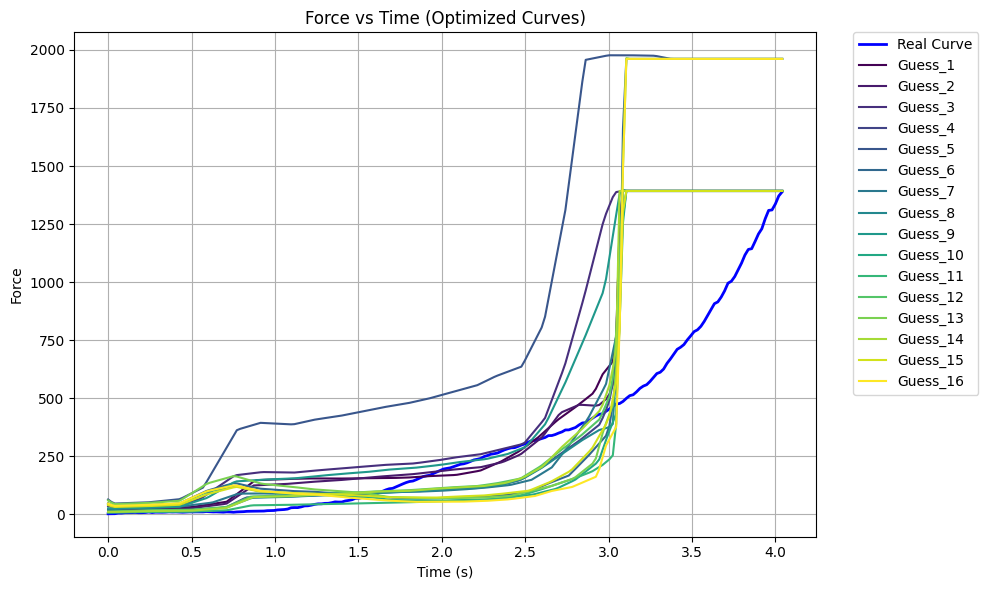

In [9]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DIRECTORY OF SAVED DATA
base_dir = r"H:\\moldflow\\moldflow_automation\\80CENTER07-real master curve"

# Load data
with open(os.path.join(base_dir, "guess_data_all.pkl"), "rb") as f:
    guess_data_all = pickle.load(f)

with open(os.path.join(base_dir, "guess_data_all_optim.pkl"), "rb") as f:
    guess_data_all_optim = pickle.load(f)

area_data = np.load(os.path.join(base_dir, "area_data.npy")).tolist()
valid_xml = np.load(os.path.join(base_dir, "valid_xml.npy")).tolist()

train_df = pd.read_csv(os.path.join(base_dir, "train_data.csv"))
best_df = pd.read_csv(os.path.join(base_dir, "best_params.csv"))

curves = np.load(os.path.join(base_dir, "resampled_curves.npz"))
common_time = curves["common_time"]
real_force_resampled = curves["real_force_resampled"]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(common_time, real_force_resampled, 'b-', label='Real Curve', linewidth=2)

if guess_data_all_optim:
    colormap = plt.get_cmap('viridis', len(guess_data_all_optim))
    for i, (key, guess_data) in enumerate(guess_data_all_optim.items()):
        guess_data_array = np.array([(float(x), float(y)) for x, y in guess_data])
        guess_time = guess_data_array[:, 0]
        guess_force = guess_data_array[:, 1] * 9.80665  
        guess_force_resampled = np.interp(common_time, guess_time, guess_force)
        plt.plot(common_time, guess_force_resampled, color=colormap(i), label=f'Guess_{i+1}')

plt.xlabel("Time (s)")
plt.ylabel("Force")
plt.title("Force vs Time (Optimized Curves)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


In [7]:
print(train_df)

           n     tau_star     tau_w         m        neg_MSE
0   0.657644  7774.952092  0.121628  1.447259 -311267.998985
1   0.789769  3399.958939  0.152730  1.001218 -247756.491801
2   0.243639  2113.247057  0.872201  1.871794 -106872.011275
3   0.516316  7483.320224  0.217830  1.130836 -108093.172384
4   0.594292  6793.060412  0.848554  1.254835 -244026.112305
5   0.394856  4174.992668  0.701979  1.538425  -91497.701780
6   0.555156  2659.978067  0.477405  1.236516 -135762.787790
7   0.681314  5845.183621  0.039995  1.301923  -93535.731014
8   0.285359  4652.730320  0.657050  1.609688  -98448.720203
9   0.412957  5248.753566  0.440786  1.104838  -93798.725788
10  0.219806  1444.604443  0.781015  1.691788  -96523.328758
11  0.468791  3272.631499  0.335427  1.366836  -96085.018759
12  0.723704  1556.013697  0.598027  1.732637 -124177.866151
13  0.606680  4803.515933  0.948894  1.782962 -260478.278098
14  0.346982  6333.882316  0.364940  1.584876  -89134.658106
15  0.435378  7086.59362

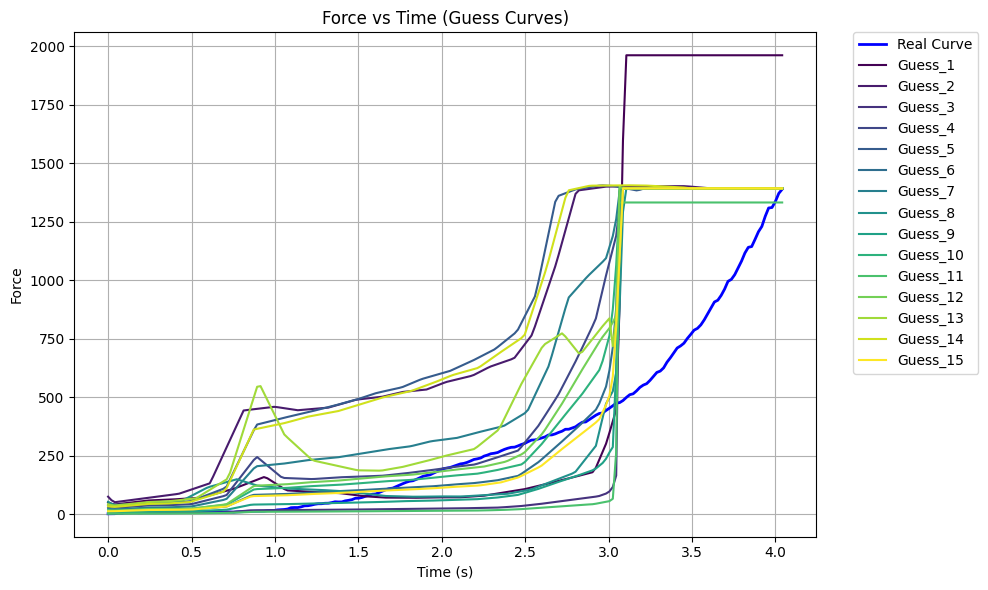

In [8]:
num_curves = len(guess_data_all)
plt.figure(figsize=(10, 6))


plt.plot(common_time, real_force_resampled, 'b-', label='Real Curve', linewidth=2)


if num_curves > 0:
    colormap = plt.get_cmap('viridis', num_curves)
    for i, (key, guess_data) in enumerate(guess_data_all.items()):
        
        guess_data_array = np.array([(float(x), float(y)) for x, y in guess_data])
        guess_time = guess_data_array[:, 0]
        guess_force = guess_data_array[:, 1] * 9.80665  

        guess_force_resampled = np.interp(common_time, guess_time, guess_force)
        plt.plot(common_time, guess_force_resampled, color=colormap(i), label=f'Guess_{i+1}')

plt.xlabel('Time (s)')
plt.ylabel('Force')  
plt.title('Force vs Time (Guess Curves)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()
